In [1]:
%load_ext autoreload
%autoreload 2
from Graph_Dataloader import Graph
from Shortest_Path_Algorithms import Dijkstra, Bellman_Ford, A_star, Floyd_Warshall, Johnson, Viterbi
import networkx as nx

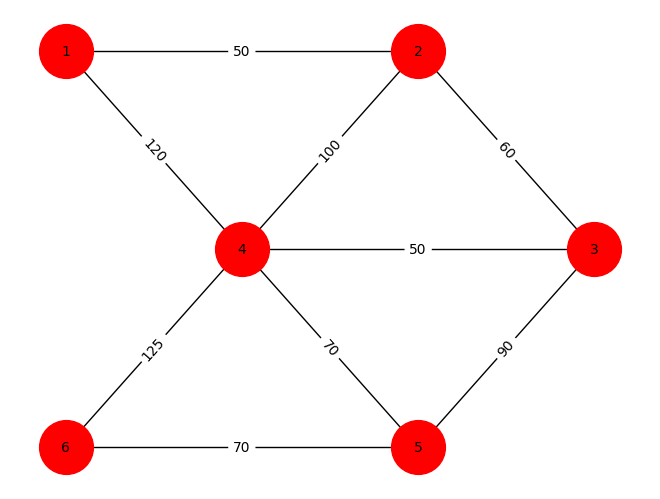

In [4]:

# For nodes we have the name and the position.
nodes = {
    "1": {"pos":(1, 3)},
    "2": {"pos":(3, 3)},
    "3": {"pos":(4, 2)},
    "4": {"pos":(2, 2)},
    "5": {"pos":(3, 1)},
    "6": {"pos":(1, 1)},
    }

# for edges we need only the edge
edges = {
    ("1", "2") : {"cost": 50},
    ("1", "4") : {"cost": 120},
    ("2", "4") : {"cost": 100},
    ("2", "3") : {"cost": 60},
    ("3", "4") : {"cost": 50},
    ("4", "5") : {"cost": 70},
    ("4", "6") : {"cost": 125},
    ("5", "6") : {"cost": 70},
    ("3", "5") : {"cost": 90}
    }


problem = Graph(directed=False)
problem.set_setting(nodes=nodes, edges=edges)
problem.plot_graph(node_label=False, edge_label=True)

In [167]:
dijkstra1 = Dijkstra(problem2.graph)
dijkstra1.fit(source="A", target="C", early_stop=False)
dijkstra1.distances

nx.dijkstra_path_length(problem1.graph, source="A", target="I", weight="cost")

Class 'Dijkstra' - Method '_algorithm'executed in 0.00006160 seconds.


28

In [168]:
bellman_ford = Bellman_Ford(problem2.graph)
bellman_ford.fit(source="A")
bellman_ford.distances

nx.bellman_ford_path(problem1.graph, source="A", target="I")

Class 'Bellman_Ford' - Method '_algorithm'executed in 0.00056960 seconds.


['A', 'B', 'E', 'I']

In [169]:
astar = A_star(problem2.graph)
astar.fit(source="A", target="C")

dijkstra = Dijkstra(problem2.graph)
dijkstra.fit(source="A", target="C")
# nx.bellman_ford_path(problem1.graph, source="A", target="I")

[Successful] Find the path to node C.
Class 'A_star' - Method '_algorithm'executed in 0.00022870 seconds.
[Successful] Find the path to node C sooner. Eearly stop!
Class 'Dijkstra' - Method '_algorithm'executed in 0.00003050 seconds.


In [170]:
import networkx as nx
import random

def generate_hard_graph(num_nodes=50, num_edges=120, directed=True, pos_range=(0, 50), weight_range=(1, 100)):
    """
    Generates a complex graph designed to make shortest path computation difficult.

    Parameters:
    - num_nodes (int): Number of nodes in the graph.
    - num_edges (int): Number of edges in the graph.
    - directed (bool): If True, creates a directed graph; otherwise, an undirected graph.
    - pos_range (tuple): The range (min, max) for node positions.
    - weight_range (tuple): The range (min, max) for edge weights.

    Returns:
    - nodes (dict): Dictionary of nodes with position attributes.
    - edges (dict): Dictionary of edges with cost attributes.
    """

    # Step 1: Generate nodes with random positions
    nodes = {f"N{i}": {"pos": (random.randint(*pos_range), random.randint(*pos_range))} for i in range(1, num_nodes + 1)}
    node_list = list(nodes.keys())

    # Step 2: Generate edges with a complex pattern
    edges = {}

    # Clustered groups: Some nodes are strongly connected
    cluster_size = max(5, num_nodes // 5)  # Each cluster has around 5 nodes
    clusters = [node_list[i:i + cluster_size] for i in range(0, num_nodes, cluster_size)]

    for cluster in clusters:
        for _ in range(len(cluster) * 2):  # More edges inside clusters
            n1, n2 = random.sample(cluster, 2)
            if (n1, n2) not in edges and (n2, n1) not in edges:
                edges[(n1, n2)] = {"cost": random.randint(*weight_range)}

    # Sparse connections between clusters (bottlenecks)
    for _ in range(num_edges - len(edges)):  # Add remaining edges
        c1, c2 = random.sample(clusters, 2)
        n1, n2 = random.choice(c1), random.choice(c2)
        if (n1, n2) not in edges and (n2, n1) not in edges:
            edges[(n1, n2)] = {"cost": random.randint(*weight_range)}

    # Step 3: Add misleading low-weight paths (traps)
    for _ in range(num_nodes // 3):  
        n1, n2 = random.sample(node_list, 2)
        if (n1, n2) not in edges and (n2, n1) not in edges:
            edges[(n1, n2)] = {"cost": random.randint(1, 5)}  # Very cheap edges

    return nodes, edges

# Example usage
num_nodes = 10000
num_edges = 150000  # More edges to make it harder
directed = True  # Change to False for an undirected graph

nodes, edges = generate_hard_graph(num_nodes, num_edges, directed)
problem = Graph(directed=directed)
problem.set_setting(nodes=nodes, edges=edges)
# problem.plot_graph(node_label=False, edge_label=False)


In [171]:
import networkx as nx
import random
import math

def generate_smart_graph(num_nodes=50, num_edges=150, directed=True, grid_size=(10, 10), weight_range=(1, 100)):
    """
    Generates a graph with nodes positioned in a grid-like structure to create meaningful heuristics.

    Parameters:
    - num_nodes (int): Number of nodes.
    - num_edges (int): Number of edges.
    - directed (bool): If True, creates a directed graph; otherwise, an undirected graph.
    - grid_size (tuple): Defines the (rows, cols) structure for positioning nodes.
    - weight_range (tuple): Range for edge weights.

    Returns:
    - nodes (dict): Dictionary of nodes with positions.
    - edges (dict): Dictionary of edges with costs.
    """

    # Step 1: Create structured positions (grid-based)
    rows, cols = grid_size
    node_positions = {}
    node_list = []

    for i in range(num_nodes):
        x = (i % cols) * 10 + random.uniform(-2, 2)  # Slight randomness
        y = (i // cols) * 10 + random.uniform(-2, 2)  # Slight randomness
        node_name = f"N{i+1}"
        node_positions[node_name] = {"pos": (x, y)}
        node_list.append(node_name)

    # Step 2: Create edges based on closeness
    edges = {}
    for _ in range(num_edges):
        n1, n2 = random.sample(node_list, 2)
        
        # Calculate Euclidean distance (as heuristic)
        x1, y1 = node_positions[n1]["pos"]
        x2, y2 = node_positions[n2]["pos"]
        distance = math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

        # If they are too far, skip (to enforce locality)
        if distance > 30:
            continue

        # Weight is proportional to distance + some random noise
        weight = distance + random.uniform(0, weight_range[1] / 10)
        
        # Avoid duplicate edges
        if (n1, n2) not in edges and (n2, n1) not in edges:
            edges[(n1, n2)] = {"cost": round(weight, 2)}

    return node_positions, edges

# Example usage
num_nodes = 1500
num_edges = 1500000  # Balanced difficulty
directed = True  # Change to False for undirected graphs

nodes, edges = generate_smart_graph(num_nodes, num_edges, directed)
problem = Graph(directed=directed)
problem.set_setting(nodes=nodes, edges=edges)
# problem.plot_graph(node_label=False, edge_label=False)


In [172]:
len(nodes), len(edges)

(1500, 12736)

In [173]:
start = "N2"
end = "N502"

dijkstra1 = Dijkstra(problem.graph)
dijkstra1.fit(source=start, target=end, early_stop=False)


dijkstra2 = Dijkstra(problem.graph)
dijkstra2.fit(source=start, target=end, early_stop=True)

astar = A_star(problem.graph)
astar.fit(source=start, target=end)

Class 'Dijkstra' - Method '_algorithm'executed in 0.01326540 seconds.
[Successful] Find the path to node N502 sooner. Eearly stop!
Class 'Dijkstra' - Method '_algorithm'executed in 0.00757370 seconds.
[Successful] Find the path to node N502.
Class 'A_star' - Method '_algorithm'executed in 0.00193080 seconds.


In [174]:
distances1 = dijkstra1.distances.items()
distances2 = dijkstra2.distances.items()
distances3 = astar.distances.items()

In [175]:
s1 = 0
s2 = 0
s3 = 0
for i, v in distances1:
    s1+=1 if v < 100000 else 0
for i, v in distances2:
    s2+=1 if v < 100000 else 0
for i, v in distances2:
    s3+=1 if v < 100000 else 0
s1, s2, s3

(1498, 531, 531)